# IRIS FLOWER DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import joblib

###### Loading the data

In [2]:
iris = load_iris()
iris_data, iris_target = pd.DataFrame(iris['data'], columns=iris["feature_names"]), pd.DataFrame(iris['target'], columns=["Target"])
iris_data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


###### Data summary

In [3]:
iris_data.shape

(150, 4)

In [4]:
np.unique(iris_data)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6,
       1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9,
       3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2,
       4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5,
       5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8,
       6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.6, 7.7, 7.9])

In [5]:
np.unique(iris_target)

array([0, 1, 2])

In [6]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


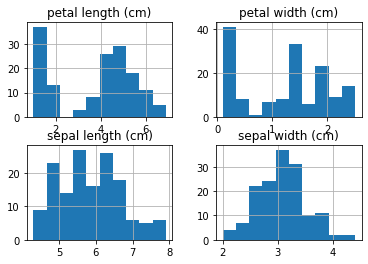

In [8]:
# histograms
iris_data.hist()
plt.show()

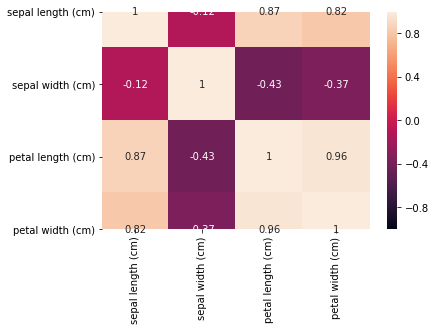

In [9]:
import seaborn as sns
Correlation = iris_data.corr()
sns.heatmap(Correlation, linewidths=0, vmin=-1, annot=True)
plt.show()

### Splitting Dataset

In [10]:
# Splitting iris dataset into Train and Test dataset.
shuffle_index = np.random.permutation(150)
data_train, data_test, target_train, target_test = train_test_split(iris["data"][shuffle_index].astype(np.float), iris["target"][shuffle_index].astype(np.float), test_size=0.2, random_state=5)

In [11]:
# Splitting Train dataset into Training and validation dataset.
d_train, d_val, t_train, t_val = train_test_split(data_train, target_train, test_size=0.2)

### Training A Model

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier

In [13]:
# evaluate each model in turn
models = []
models.append(('DTC', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('LSVC', LinearSVC()))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class="auto")))
models.append(("SGDC", SGDClassifier()))
models.append(('SVC', SVC(gamma='auto')))
# evaluate each model in turn
scores = []
names = []
for name, model in models:
    cv_score = cross_val_score(model, d_train, t_train, cv=3, scoring="accuracy")
    scores.append(cv_score)
    names.append(name)
    mod = "%s: %f (%f)" % (name, cv_score.mean(), cv_score.std())
    print(mod)

DTC: 0.937775 (0.024410)
GNB: 0.948528 (0.027889)
LSVC: 0.947224 (0.031114)
LR: 0.917257 (0.027214)
SGDC: 0.801982 (0.058989)
SVC: 0.969045 (0.024759)


c:\users\tolu akinlabi\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\tolu akinlabi\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\tolu akinlabi\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


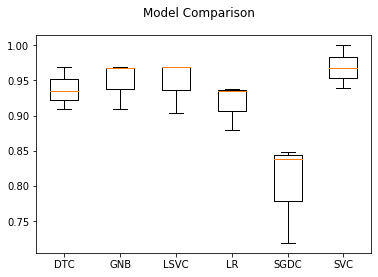

In [14]:
fig = plt.figure()
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.boxplot(scores)
plt.show()

As you can see, we have SVC as the best model. So i will be using the SVC model tp make predictions

###### Using SVC Model

In [15]:
model = SVC(gamma='auto', random_state=5)

In [16]:
model = model.fit(d_train, t_train)

In [17]:
joblib.dump(model, "iris_SVC_model.pkl")

['iris_SVC_model.pkl']

In [18]:
model.predict([d_train[10]])

array([2.])

In [19]:
model.score(d_train, t_train)

0.9895833333333334

In [20]:
scores = cross_val_score(model, d_train, t_train, scoring="accuracy", cv=3)
scores.mean()

0.9690452916259368

In [21]:
model.score(d_val, t_val)

0.9166666666666666

In [22]:
scores = cross_val_score(model, d_val, t_val, scoring="accuracy", cv=3)
scores.mean()

0.9166666666666666

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [24]:
predictions = model.predict(d_val)
accuracy_score(t_val, predictions)

0.9166666666666666

In [25]:
confusion_matrix(t_val, predictions)

array([[7, 0, 0],
       [0, 9, 2],
       [0, 0, 6]], dtype=int64)

In [26]:
print(classification_report(t_val, predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       1.00      0.82      0.90        11
         2.0       0.75      1.00      0.86         6

    accuracy                           0.92        24
   macro avg       0.92      0.94      0.92        24
weighted avg       0.94      0.92      0.92        24



In [27]:
model.score(data_test, target_test)

1.0

In [28]:
scores = cross_val_score(model, data_test, target_test, scoring="accuracy", cv=3)

In [29]:
scores.mean()

1.0

In [30]:
predictions = model.predict(data_test)
accuracy_score(target_test, predictions)

1.0

In [31]:
confusion_matrix(target_test, predictions)

array([[ 8,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 11]], dtype=int64)

In [32]:
print(classification_report(target_test, predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

